## Лабораторная №2 "Методы классификации данных"
### Выполнил вариант № 29 студент группы 18-ИВТ-3 Модин Артем

##### Цель лабораторной работы
Получение навыков работы с методами классификации. 
Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт). 
Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции; 
Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая) 
-- Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию); 
Выполните замену категориальных признаков; выберите и обоснуйте способ замены; 
Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации); 
Заполните пропущенные значения в данных; 
Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Определите схему построения многоклассового классификатора, используемую по умолчанию (опишите используемую схему кодирования, обоснуйте свой выбор). Постройте, если это возможно, многоклассовую классификацию на основе схем «один-против-всех» и «все-против-всех». Оцените точность классификации для каждой их схем. Постройте кривые PR и ROC (для каждого из классов должны быть построены отдельные кривые, а также кривые для микро и макроусреднения метрик качества). Для линейного классификатора используйте регуляризацию.  
Сравните кривые для классификаторов, указанных в задании, сделайте выводы. 
 
Кодировка классификаторов: 
1 – классификатор K ближайших соседей (задаётся количество ближайших объектов); 
2 – классификатор K ближайших соседей (задаётся радиус для выбора ближайших объектов); 
3 – линейный классификатор (персептрон); 
4 – логический классификатор (бинарное решающее дерево). 

##### Набор данных 4 
##### Классификаторы 3, 4

### Задание №1
Изучить набор данных. Создать описание набора данных на русском языке. 
Описать признаки, используемые в наборе данных (включить полученные описания в отчёт). 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')
import sklearn as sk
from sklearn.linear_model import Perceptron
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Perceptron
from sklearn.calibration import CalibratedClassifierCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import average_precision_score 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize
%matplotlib inline
iris = pd.read_csv('iris.data.txt', names=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species'])
ir_data = pd.DataFrame(iris)
ir_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


##### Cm - единица измерения 
- Первый стоблец - длина чашелистника
- Второй столбец - ширина чашелистника
- Третий столбец - длина лепестка чашелистника
- Четвертый столбец - ширина лепестка чашелистника
- Пятый стоблец - виды чашелистника(Iris Setosa,Iris Versicolour,Iris Virginica)


### Задание №2
Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции

In [2]:
len(ir_data)


150

In [3]:
ir_data = ir_data.drop_duplicates()
len(ir_data)

147

Найдено и удалено 3 дубликата строк в наборе данных

### Задание №3
Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая) 

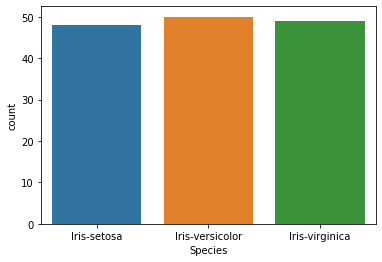

In [4]:
sns.countplot(x='Species', data=ir_data)

Они итак сбалансированы. 

### Задание №4
Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. 
Выберите способ масштабирования (например, нормализацию или стандартизацию)

До масштабирования


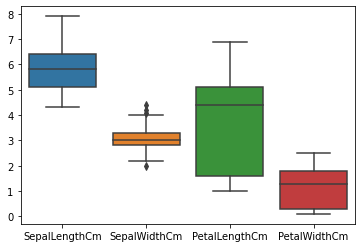

In [5]:
masshtab = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
sns.boxplot(data = ir_data[masshtab])
print("До масштабирования")

После масштабирования методом  стандартизации


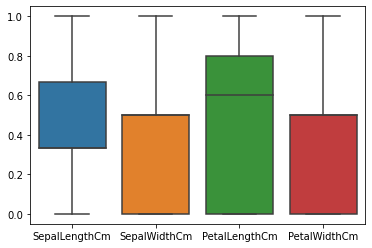

In [6]:
er = preprocessing.MinMaxScaler()
ir_data[masshtab]= er.fit_transform(ir_data[['SepalLengthCm', 'SepalWidthCm','PetalLengthCm','PetalWidthCm']].values.astype(int))
sns.boxplot(data=ir_data[masshtab])
print('После масштабирования методом  стандартизации')

### Задание №5
Выполните замену категориальных признаков; выберите и обоснуйте способ замены

In [7]:
newSpecies = LabelEncoder() 
ir_data['Species'] = newSpecies.fit_transform(ir_data['Species'])
ir_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0.333333,0.5,0.0,0.0,0
1,0.000000,0.5,0.0,0.0,0
2,0.000000,0.5,0.0,0.0,0
3,0.000000,0.5,0.0,0.0,0
4,0.333333,0.5,0.0,0.0,0
...,...,...,...,...,...
145,0.666667,0.5,0.8,1.0,2
146,0.666667,0.0,0.8,0.5,2
147,0.666667,0.5,0.8,1.0,2
148,0.666667,0.5,0.8,1.0,2


In [8]:
def code_myohe(data, feature):
    for i in data[feature].unique():
        data[feature + '=' + str(i)] = (data[feature] == i).astype(float)

code_myohe(ir_data, 'Species')

In [9]:
ir_data.drop('Species', axis = 1, inplace = True)
ir_data.rename(columns={'Species=0': 'Iris Setosa', 'Species=1': 'Iris Versicolour', 'Species=2': 'Iris Virginica'}, inplace=True)
ir_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris Setosa,Iris Versicolour,Iris Virginica
0,0.333333,0.5,0.0,0.0,1.0,0.0,0.0
1,0.000000,0.5,0.0,0.0,1.0,0.0,0.0
2,0.000000,0.5,0.0,0.0,1.0,0.0,0.0
3,0.000000,0.5,0.0,0.0,1.0,0.0,0.0
4,0.333333,0.5,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
145,0.666667,0.5,0.8,1.0,0.0,0.0,1.0
146,0.666667,0.0,0.8,0.5,0.0,0.0,1.0
147,0.666667,0.5,0.8,1.0,0.0,0.0,1.0
148,0.666667,0.5,0.8,1.0,0.0,0.0,1.0


### Задание №6
Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации)

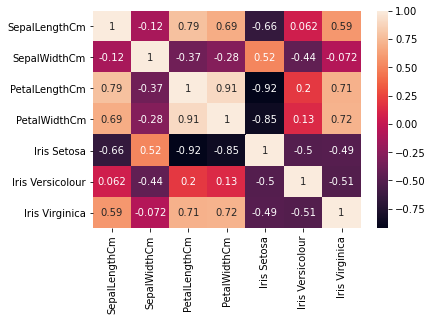

In [10]:
ir_data_corr = ir_data.corr()
sns.heatmap(ir_data_corr, annot = True)

### Задание №7
Заполните пропущенные значения в данных

In [11]:
ir_data.isnull().sum()

SepalLengthCm       0
SepalWidthCm        0
PetalLengthCm       0
PetalWidthCm        0
Iris Setosa         0
Iris Versicolour    0
Iris Virginica      0
dtype: int64

##### Пропущенных значений в данных нет

### Задание №8
Решите поставленную задачу классификации в соответствии с заданием. 
При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Определите схему построения многоклассового классификатора, используемую по умолчанию (опишите используемую схему кодирования, обоснуйте свой выбор). 
Постройте, если это возможно, многоклассовую классификацию на основе схем «один-против-всех» и «все-против-всех». 
Оцените точность классификации для каждой их схем. Постройте кривые PR и ROC (для каждого из классов должны быть построены отдельные кривые, а также кривые для микро и макроусреднения метрик качества). 
Для линейного классификатора используйте регуляризацию.  

In [12]:
dX = ir_data
dY = ir_data['Iris Setosa']
tr_x, t_x, tr_y, t_y = train_test_split(dX, dY, test_size=0.3, random_state = 0)


In [13]:
len(ir_data)

147

In [14]:
ir_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris Setosa,Iris Versicolour,Iris Virginica
0,0.333333,0.5,0.0,0.0,1.0,0.0,0.0
1,0.000000,0.5,0.0,0.0,1.0,0.0,0.0
2,0.000000,0.5,0.0,0.0,1.0,0.0,0.0
3,0.000000,0.5,0.0,0.0,1.0,0.0,0.0
4,0.333333,0.5,0.0,0.0,1.0,0.0,0.0


In [15]:
perc = Perceptron()

search = GridSearchCV(estimator=perc, param_grid={
    'alpha': np.linspace(0, 1, 20)[1:],
    'max_iter': [x for x in range(1, 50)],
}, n_jobs=-1)
search.fit(tr_x, tr_y)
a = search.best_estimator_.alpha
max_iter = search.best_estimator_.max_iter
best = search.best_score_
print(' best:', best,"\n",'alpha:', a,"\n", 'max_iter:', max_iter)

perc = Perceptron(alpha=a, max_iter=max_iter)
perc.fit(tr_x, tr_y)
perc_predict = perc.predict(t_x)
print(' Accuracy perc: %.5f' % accuracy_score(t_y, perc_predict))

 best: 1.0 
 alpha: 0.05263157894736842 
 max_iter: 1
 Accuracy perc: 1.00000


In [16]:
decTC = DecisionTreeClassifier()
params = {'max_depth': list(range(1,5)), 'max_features': list(range(1,5))}

decTC_grid = GridSearchCV(decTC, params)
decTC_grid.fit (tr_x, tr_y)

best_features = decTC_grid.best_estimator_.max_features
best_depth = decTC_grid.best_estimator_.max_depth
best_score = decTC_grid.best_score_
print(' best:', best_score, "\n", 'at features number:', best_features, "\n", 'at depth:', best_depth)

decTC = DecisionTreeClassifier(max_depth=best_depth, max_features=best_features)
decTC.fit(tr_x, tr_y)
accuracy_score  = np.mean(t_y == decTC.predict(t_x))
print(' Accuracy decTC: %.5f' % accuracy_score)

 best: 1.0 
 at features number: 4 
 at depth: 1
 Accuracy decTC: 1.00000


### Задание №9
Сравните кривые для классификаторов, указанных в задании, сделайте выводы.


In [17]:
def addPloPr(prob, occupancy, label, test):
    precision, recall, _ = precision_recall_curve(test, prob[:, occupancy])
    avPreSc = average_precision_score(test, prob[:, occupancy])
    plt.plot(recall, precision, label='%s PR (area = %f)' % (label, avPreSc))

In [18]:
t_y_inversion = [1-y for y in t_y]

prob_decTC = decTC.predict_proba(t_x)

cperc = CalibratedClassifierCV(perc, cv=10)
cperc.fit(tr_x, tr_y)
prob_perc = cperc.predict_proba(t_x)

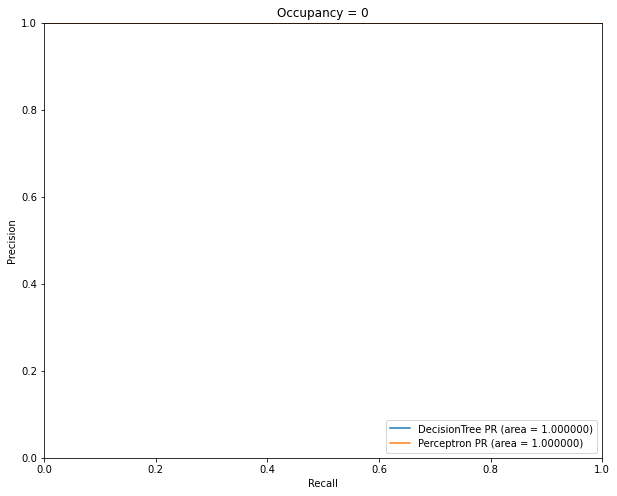

In [19]:
plt.figure(figsize=(10,8))

addPloPr(prob_decTC, 0, 'DecisionTree', t_y_inversion)
addPloPr(prob_perc, 0, 'Perceptron', t_y_inversion)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Occupancy = 0')
plt.legend(loc=4, fontsize='medium')
plt.show()

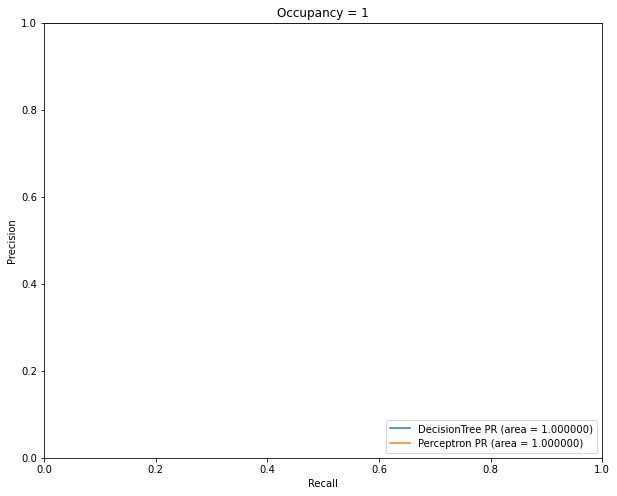

In [20]:
plt.figure(figsize=(10,8))

addPloPr(prob_decTC, 1, 'DecisionTree', t_y)
addPloPr(prob_perc, 1, 'Perceptron', t_y)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Occupancy = 1')
plt.legend(loc=4, fontsize='medium')
plt.show()

In [21]:
def addPlRoc0(prob, label, test):
    tpr, fpr, _ = roc_curve(test, prob[:, 0])
    roc_auc  = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s ROC (area = %f)' % (label, roc_auc)) 

def addPlRoc1(prob, label, test):
    fpr, tpr, _ = roc_curve(test, prob[:, 1])
    roc_auc  = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s ROC (area = %f)' % (label, roc_auc))

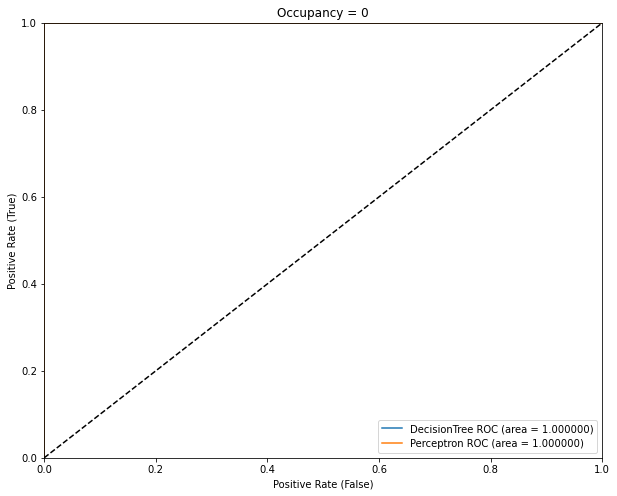

In [22]:
plt.figure(figsize=(10,8))

addPlRoc0(prob_decTC, 'DecisionTree', t_y)
addPlRoc0(prob_perc, 'Perceptron', t_y)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Positive Rate (False)')
plt.ylabel('Positive Rate (True)')
plt.legend(loc=4, fontsize='medium')
plt.title('Occupancy = 0')
plt.show()

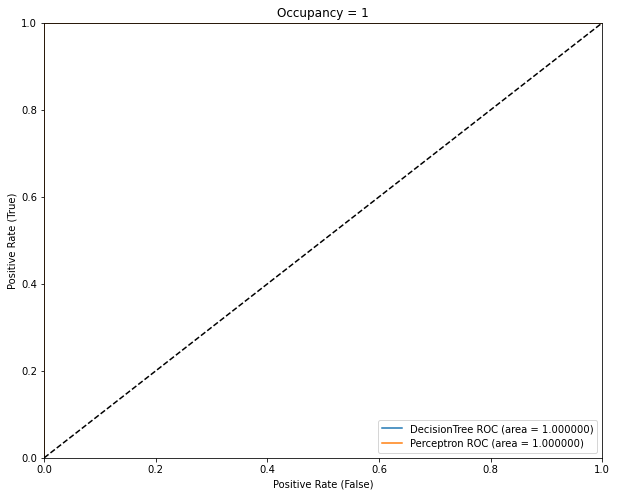

In [23]:
plt.figure(figsize=(10,8))

addPlRoc1(prob_decTC, 'DecisionTree', t_y)
addPlRoc1(prob_perc, 'Perceptron', t_y)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Positive Rate (False)')
plt.ylabel('Positive Rate (True)')
plt.legend(loc=4, fontsize='medium')
plt.title('Occupancy = 1')
plt.show()